# Importación de librerias necesarias

In [29]:

import pandas as pd # Importando pandas para trabajar con DataFrames y Series de Pandas
import numpy as np # Importando numpy para trabajar con matrices y vectores  de numpy
import seaborn as sns# Importando seaborn para trabajar con gráficos y visualizaciones
from sklearn import preprocessing # Importando preprocessing para trabajar con preprocesamiento de datos
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder#importar método labelEndoder
from sklearn.preprocessing import OneHotEncoder#importar método onehotEncoder

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada.

In [3]:
df = pd.read_csv('Fish.csv')# Leyendo el archivo Fish.csv y guardandolo en un DataFrame 
df# Imprimiendo el DataFrame df para verificar que se haya leido correctamente

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Descripción de la fuente del Dataset

In [4]:
df.head()# Imprimiendo las primeras 5 filas del DataFrame df para verificar que se haya leido correctamente y que no haya nulos

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.info() # Imprimiendo información del DataFrame df para verificar que no haya nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.isnull().sum() # Imprimiendo la cantidad de nulos en cada columna del DataFrame df

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
df.Species.value_counts()# Imprimiendo la cantidad de cada especie en el DataFrame df

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [8]:
df.describe()# Imprimiendo la información descriptiva del DataFrame df para verificar que no haya nulos 

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


<AxesSubplot:xlabel='Species', ylabel='count'>

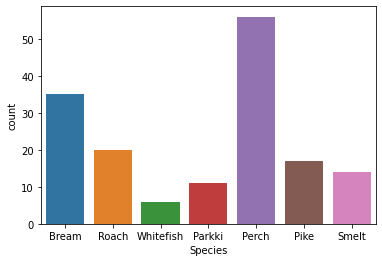

In [11]:
sns.countplot(data=df,x='Species')# Imprimiendo la cantidad de cada especie en un gráfico de barras para verificar que no haya nulos

## One one_hot_encoded_data

In [21]:
#One one_hot_encoded_data
one_hot_encoded_data = pd.get_dummies(df, columns = ['Species'])# One-hot encoding de la columna Species del DataFrame df y guardandolo en un DataFrame one_hot_encoded_data
one_hot_encoded_data

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [25]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['Species']= label_encoder.fit_transform(df['Species']) # Encodiendo la columna Species del DataFrame df y guardandolo en un DataFrame df con la columna Species encodeada 
df['Species'].unique() # Imprimiendo la cantidad de cada especie en el DataFrame df con la columna Species 
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


## Dummy Coding

In [26]:
#transformar los valores de la variable region haciendo uso del dummy coding
dummy_df = pd.get_dummies(df['Species'])
#imprimir el dataset con los datos transformados en la variable sexo
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


## Label Encoding

In [27]:
#Almacena en X todas las características con datos String
X = df.select_dtypes(include=[object])
#imprimir los 10 primeros datos string que existen en el dataset 
X.head(10)

""
0
1
2
3
4
5
6
7
8
9


In [30]:
#almacena valores únicos 
encoder = LabelEncoder()
#transformar los valores de la variable Species haciendo uso del label encoder
df["Species"] = encoder.fit_transform(df["Species"])
#imprimir el dataset con los datos transformados en la variable Species
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [15]:
name0=df['Species'].unique().tolist()
name=sorted(name0)
print(name)
N=list(range(len(name)))
normal_mapping=dict(zip(name,N)) 
reverse_mapping=dict(zip(N,name))

['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']


In [16]:
data1=df.copy()
data1['Species']=df['Species'].map(normal_mapping)
print(normal_mapping)

{'Bream': 0, 'Parkki': 1, 'Perch': 2, 'Pike': 3, 'Roach': 4, 'Smelt': 5, 'Whitefish': 6}


In [18]:
data1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [31]:
regresion_lin = linear_model.LinearRegression()

In [32]:
regresion_lin.fit(df[['Species',	'Weight',	'Length1',	'Length2',	'Length3',	'Height']],df['Width'])

LinearRegression()

In [33]:
# Mostrar coeficientes 
regresion_lin.coef_

array([ 1.68479074e-01, -1.10292549e-04, -1.56236602e-01,  8.32846084e-01,
       -5.92764669e-01,  3.89021892e-01])

In [34]:
# Se muestracon Label Encoding
regresion_lin.intercept_

-0.46482383943347116

In [35]:
regresion_lin.intercept_ # Se muestra el punto de intercepción

-0.46482383943347116